# A look at the joint likelihood ratio and joint score

In [1]:
import sys, os
sys.path.append('../')

import logging
import numpy as np
import matplotlib.pyplot as plt

from simulation.units import *
from inference.utils import s_from_r

logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.INFO
)

## Load data

In [2]:
setup = "mass"

In [3]:
theta = np.load("../data/samples/theta_train_{}.npy".format(setup))
x = np.load("../data/samples/x_train_{}.npy".format(setup))
y = np.load("../data/samples/y_train_{}.npy".format(setup))
t_xz = np.load("../data/samples/t_xz_train_{}.npy".format(setup))
r_xz = np.load("../data/samples/r_xz_train_{}.npy".format(setup))
z = np.load("../data/samples/z_train_{}.npy".format(setup))

In [6]:
f_sub = theta[y==0][:,0]
beta = theta[y==0][:,1]

m_host = z[y==0][:,0]
n_sub_realiz = z[y==0][:,7]
f_sub_realiz = z[y==0][:,8]

t_xz0 = t_xz[y==0][:,0]
t_xz1 = t_xz[y==0][:,1]
r_xz_inverse = r_xz[y==1].flatten()
r_xz_ = r_xz[y==0].flatten()
s_xz_ = s_from_r(r_xz_)
s_xz_inverse = s_from_r(r_xz_inverse)

## Plot parameters vs subhalo properties

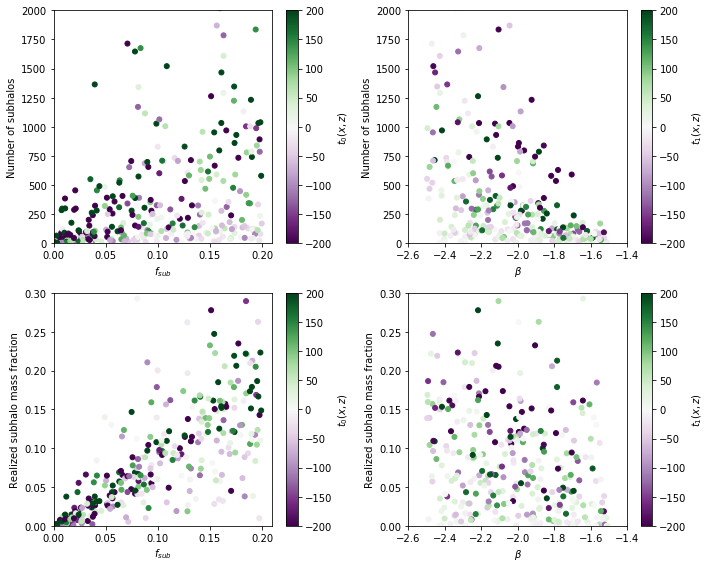

In [23]:
skip = 1000
fig = plt.figure(figsize=(10,8))

ax = plt.subplot(2,2,1)
sc = plt.scatter(
    f_sub[::skip], n_sub_realiz[::skip],
    s=25.,
    c=t_xz0[::skip], vmin=-200, vmax=200, cmap='PRGn',
)
cbar = plt.colorbar(sc)
plt.xlabel(r"$f_{sub}$")
plt.ylabel("Number of subhalos")
cbar.set_label(r"$t_0(x,z)$")
plt.xlim(0.,0.21)
plt.ylim(0.,2000.)

ax = plt.subplot(2,2,2)
plt.scatter(
    beta[::skip], n_sub_realiz[::skip],
    s=25., 
    c=t_xz1[::skip], vmin=-100, vmax=100, cmap='PRGn',
)
cbar = plt.colorbar(sc)
plt.xlabel(r"$\beta$")
plt.ylabel("Number of subhalos")
cbar.set_label(r"$t_1(x,z)$")
plt.xlim(-2.6,-1.4)
plt.ylim(0.,2000.)

ax = plt.subplot(2,2,3)
sc = plt.scatter(
    f_sub[::skip], f_sub_realiz[::skip],
    s=25.,
    c=t_xz0[::skip], vmin=-200, vmax=200, cmap='PRGn',
)
cbar = plt.colorbar(sc)
plt.xlabel(r"$f_{sub}$")
plt.ylabel("Realized subhalo mass fraction")
cbar.set_label(r"$t_0(x,z)$")
plt.xlim(0.,0.21)
plt.ylim(0.,0.3)

ax = plt.subplot(2,2,4)
plt.scatter(
    beta[::skip], f_sub_realiz[::skip],
    s=25., 
    c=t_xz1[::skip], vmin=-100, vmax=100, cmap='PRGn',
)
cbar = plt.colorbar(sc)
plt.xlabel(r"$\beta$")
plt.ylabel("Realized subhalo mass fraction")
cbar.set_label(r"$t_1(x,z)$")
plt.xlim(-2.6,-1.4)
plt.ylim(0.,0.3)

plt.tight_layout()
plt.savefig("../figures/theta_vs_subhalo_params_vs_joint_score_{}.pdf".format(setup))

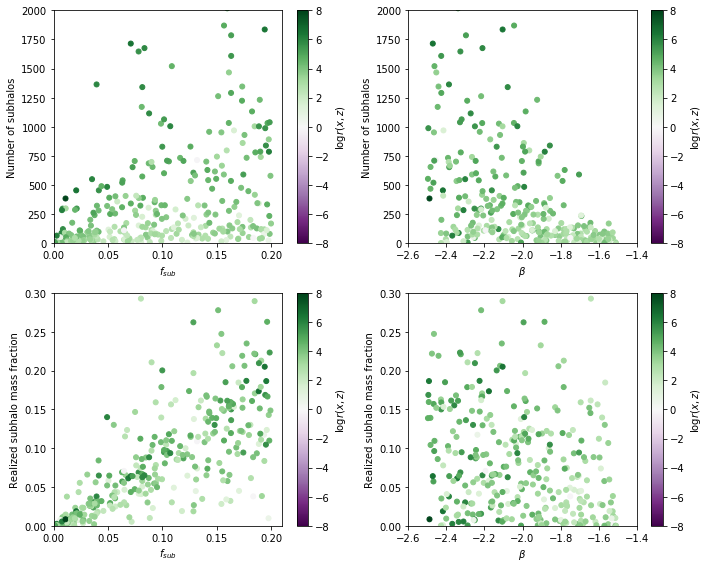

In [24]:
skip = 1000
fig = plt.figure(figsize=(10,8))

ax = plt.subplot(2,2,1)
sc = plt.scatter(
    f_sub[::skip], n_sub_realiz[::skip],
    s=25.,
    c=np.log(r_xz_[::skip]), vmin=-8, vmax=8, cmap='PRGn',
)
cbar = plt.colorbar(sc)
plt.xlabel(r"$f_{sub}$")
plt.ylabel("Number of subhalos")
cbar.set_label(r"$\log r(x,z)$")
plt.xlim(0.,0.21)
plt.ylim(0.,2000.)

ax = plt.subplot(2,2,2)
plt.scatter(
    beta[::skip], n_sub_realiz[::skip],
    s=25., 
    c=np.log(r_xz_[::skip]), vmin=-8, vmax=8, cmap='PRGn',
)
cbar = plt.colorbar(sc)
plt.xlabel(r"$\beta$")
plt.ylabel("Number of subhalos")
cbar.set_label(r"$\log r(x,z)$")
plt.xlim(-2.6,-1.4)
plt.ylim(0.,2000.)

ax = plt.subplot(2,2,3)
sc = plt.scatter(
    f_sub[::skip], f_sub_realiz[::skip],
    s=25.,
    c=np.log(r_xz_[::skip]), vmin=-8, vmax=8, cmap='PRGn',
)
cbar = plt.colorbar(sc)
plt.xlabel(r"$f_{sub}$")
plt.ylabel("Realized subhalo mass fraction")
cbar.set_label(r"$\log r(x,z)$")
plt.xlim(0.,0.21)
plt.ylim(0.,0.3)

ax = plt.subplot(2,2,4)
plt.scatter(
    beta[::skip], f_sub_realiz[::skip],
    s=25., 
    c=np.log(r_xz_[::skip]), vmin=-8, vmax=8, cmap='PRGn',
)
cbar = plt.colorbar(sc)
plt.xlabel(r"$\beta$")
plt.ylabel("Realized subhalo mass fraction")
cbar.set_label(r"$\log r(x,z)$")
plt.xlim(-2.6,-1.4)
plt.ylim(0.,0.3)

plt.tight_layout()
plt.savefig("../figures/theta_vs_subhalo_params_vs_joint_ratio_{}.pdf".format(setup))

## Histogram joint likelihood ratio

/Users/johannbrehmer/anaconda3/envs/lensing/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


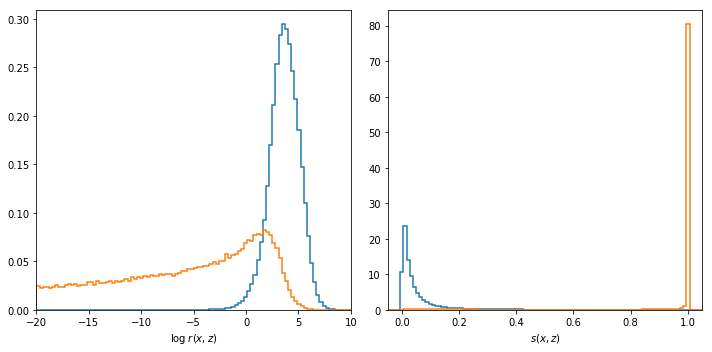

In [13]:
fig = plt.figure(figsize=(10., 5.))

ax = plt.subplot(1,2,1)
plt.hist(np.log(r_xz_), range=(-20., 10.), bins=100, histtype="step", lw=1.5, color="C0", density=True)
plt.hist(np.log(r_xz_inverse), range=(-20., 10.), bins=100, histtype="step", lw=1.5, color="C1", density=True)
plt.xlim(-20.,10.)
plt.xlabel(r"$\log \; r(x,z)$")

ax = plt.subplot(1,2,2)
plt.hist(s_xz_, range=(-0.05,1.05), bins=100, histtype="step", lw=1.5, color="C0", density=True)
plt.hist(s_xz_inverse, range=(-0.05,1.05), bins=100, histtype="step", lw=1.5, color="C1", density=True)
plt.xlim(-0.05,1.05)
plt.xlabel(r"$s(x,z)$")

plt.tight_layout()
plt.savefig("../figures/joint_ratio_histo_{}.pdf".format(setup))


## Expectation values

In [14]:
np.mean(1./r_xz_), np.std(1./r_xz_) / 500**0.5

(0.1927302682456045, 1.0705765736114312)

In [15]:
np.mean(r_xz_inverse), np.std(r_xz_inverse) / 500**0.5

(nan, nan)

In [16]:
np.mean(t_xz0), np.std(t_xz0) / 500**0.5

(-1.4632229313125598, 16.598323573924752)

In [17]:
np.mean(t_xz1), np.std(t_xz1) / 500**0.5

(-2.4441242530647354, 3.1668441284904274)

In [18]:
np.mean(t_xz0[f_sub_realiz<f_sub*0.9]), np.mean(t_xz0[(f_sub*0.9<f_sub_realiz)*(f_sub_realiz< f_sub*1.1)]), np.mean(t_xz0[f_sub_realiz>f_sub*1.1])

(-36.562612977422035, 52.31951653889661, 52.464360348991086)

In [19]:
np.mean(t_xz1[f_sub_realiz<f_sub*0.9]), np.mean(t_xz1[(f_sub*0.9<f_sub_realiz)*(f_sub_realiz< f_sub*1.1)]), np.mean(t_xz1[f_sub_realiz>f_sub*1.1])

(-1.3748339689293898, -5.761450520024515, -2.5796306844478467)